In [1]:
import pystan
import numpy as np
import pandas as pd


Data = pd.read_csv('trend2.csv')

In [2]:
Data = Data.dropna()
Data = Data.reset_index(drop = True)
Data.tail(10)

,country,year,church2,cc,gini_net,rgdpl
578,United States,1998,26.88536,United States,37.09401,36.92394
579,United States,1999,42.58013,United States,36.97413,38.17455
580,United States,2000,25.37684,United States,36.80000,39.15974
581,United States,2001,30.00000,United States,36.98793,38.96044
582,United States,2002,26.64357,United States,37.09895,39.15404
583,United States,2003,31.00000,United States,37.16354,39.79302
584,United States,2004,25.05188,United States,37.20000,40.91001
585,United States,2005,31.42520,United States,37.08701,42.53482
586,United States,2006,29.70013,United States,36.87890,43.25840
587,United States,2008,26.67819,United States,36.02488,43.34071


In [3]:
# enumerate countries
countries = Data.country.str.strip()
unique_countries = countries.unique()
num_countries = len(unique_countries)
countries_dict = dict(zip(unique_countries, range(num_countries)))
countries = countries.replace(countries_dict).values
N = len(countries);
J = num_countries

In [7]:
Model = """
data {
    int<lower=0> J;
    int<lower=0> N;
    int<lower=0> K;
    int<lower=1,upper=J> country[N];
    matrix[N,K] X;
    vector[N] y;
}

parameters {
    vector[J] a;
    vector[K] B;
    real mu_a;
    real<lower=0,upper=200> sigma_a;
    real<lower=0,upper=200> sigma_y;
}

transformed parameters {
    vector[N] y_hat;
    for(i in 1:N)
        y_hat[i] = a[country[i]] + X[i] * B;
}

model {
    sigma_a ~ normal(0,10);
    sigma_y ~ normal(0,10);
    B ~ normal(0,10);
    a ~ normal(mu_a,sigma_a);
    y ~ normal(y_hat,sigma_y);
}
"""

model_data = {'N':N,
              'J':J,
              'K':2,
              'country':countries + 1,
              'X': Data[['gini_net','rgdpl']],
              'y': Data['church2']}

model_fit = pystan.stan(model_code = Model, data = model_data, iter = 1000, chains = 2, n_jobs = 2)

print(model_fit)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a37bf300561b32f48d90d460e1a35087 NOW.


Inference for Stan model: anon_model_a37bf300561b32f48d90d460e1a35087.
2 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=1000.

             mean se_mean     sd    2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a[1]        19.69    1.03   4.55   11.34  16.38  19.27   22.9  28.73     19   1.12
a[2]        22.63    0.93   4.34   14.66  19.51  22.55  25.78  31.21     22   1.11
a[3]        18.88    0.86   3.81   12.03  16.16  18.64  21.54  26.61     20   1.12
a[4]          0.8    0.91   4.59    -7.6  -2.45   0.58   4.12   9.76     25   1.11
a[5]        28.64     1.1   4.92   19.67  25.02   28.3   32.1   38.3     20   1.12
a[6]        11.97    1.64   7.53   -1.07   6.53  11.22  17.17  28.28     21   1.13
a[7]        11.92     1.2   4.83    3.06    8.6  11.65  15.05  22.27     16   1.12
a[8]         7.41    0.85   4.02    0.04   4.63    7.1  10.08  15.49     22   1.11
a[9]         7.66    0.87   3.79     1.1   4.82   7.31  10.36  15.

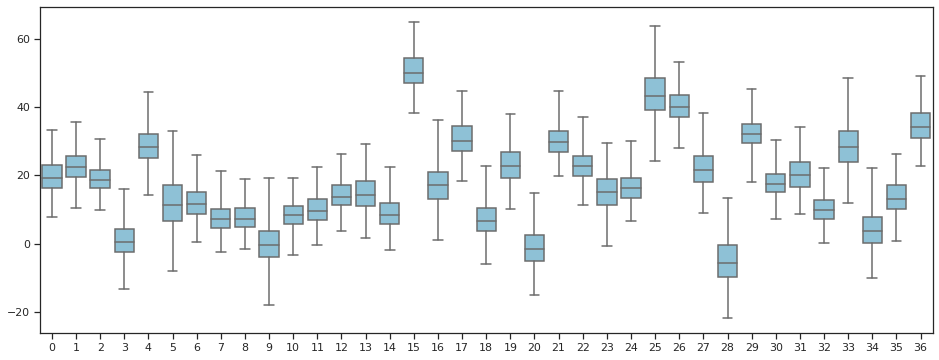

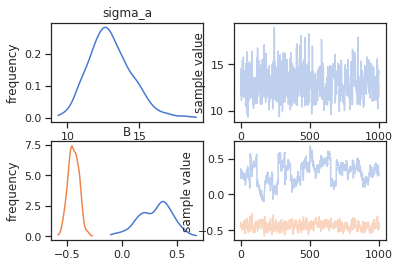

In [21]:
import matplotlib.pyplot as plt
a_sample = pd.DataFrame(model_fit['a'])

import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)

# Plot the orbital period with horizontal boxes
plt.figure(figsize=(16, 6))
sns.boxplot(data=a_sample, whis=np.inf, color="c")

model_fit.plot(pars=['sigma_a', 'B']);

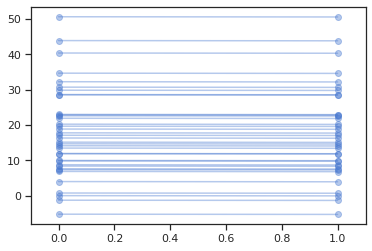

In [22]:
xvals = np.arange(2)
bp = model_fit['a'].mean(axis=0)
mp = model_fit['B'].mean()
for bi in bp:
    plt.plot(xvals, mp*xvals + bi, 'bo-', alpha=0.4)
plt.xlim(-0.1,1.1);

In [26]:
Model2 = """
data {
    int<lower=0> J;
    int<lower=0> N;
    int<lower=0> K;
    int<lower=1,upper=J> country[N];
    matrix[N,K] X;
    vector[N] y;
}

parameters {
    vector[J] a;
    vector[K] B;
    real mu_a;
    real<lower=0,upper=200> sigma_a;
    real<lower=0,upper=200> sigma_y;
}

transformed parameters {
    vector[N] y_hat;
    for(i in 1:N)
        y_hat[i] = a[country[i]] + X[i] * B;
}

model {
    sigma_a ~ normal(0,10);
    sigma_y ~ normal(0,10);
    B[1] ~ normal(15,15);
    B[2] ~ normal(0,10);
    a ~ normal(mu_a,sigma_a);
    y ~ normal(y_hat,sigma_y);
}
"""

model_data2 = {'N':N,
              'J':J,
              'K':2,
              'country':countries + 1,
              'X': Data[['gini_net','rgdpl']],
              'y': Data['church2']}

model_fit2 = pystan.stan(model_code = Model, data = model_data2, iter = 1000, chains = 4, n_jobs = 2)

print(model_fit2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a37bf300561b32f48d90d460e1a35087 NOW.


Inference for Stan model: anon_model_a37bf300561b32f48d90d460e1a35087.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a[1]        20.48    1.07   5.03   9.37  17.27   20.7  23.93  29.55     22    1.3
a[2]         23.3    0.99   4.78  12.86  20.22  23.51  26.64   32.0     23   1.27
a[3]         19.5    0.86   4.17   9.91  16.86  19.71  22.32   27.4     23   1.27
a[4]         1.56    1.01   4.96  -9.28  -1.56   1.65   4.87   10.8     24   1.27
a[5]        29.26    1.07   5.26  17.66  25.75  29.55   33.0  39.15     24   1.26
a[6]         13.2    1.76   8.19  -5.35   7.84  13.63  18.85  27.96     22   1.31
a[7]        12.66    1.02   5.19   1.63   9.28  12.77   16.3  22.14     26   1.24
a[8]         8.04     0.9   4.35  -1.59   5.23   8.22  11.03   16.0     23   1.27
a[9]         8.22    0.89   4.22  -0.93   5.52   8.44  11.14  15.72     23 

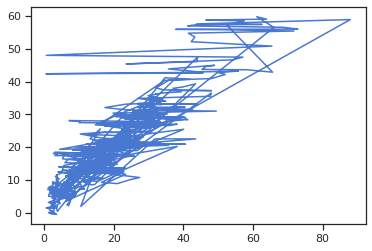

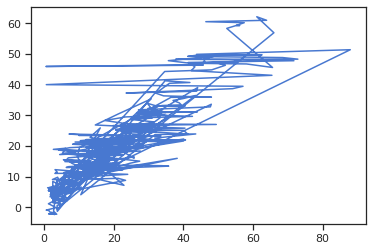

In [51]:
X = Data['church2'].values
Y = model_fit['y_hat']
Y = Y[1]
plt.plot(X,Y)

Y1 = model_fit2['y_hat']
Y1 = Y1[19]
plt.figure()
plt.plot(X,Y1)